In [1]:
from keras.datasets import mnist
import numpy as np

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (_, _) = mnist.load_data()

In [11]:
specific_idx = np.where(y_train == 1)[0]

In [12]:
data = X_train[specific_idx].reshape(-1, 28, 28, 1)

In [1]:
data.shape

NameError: name 'data' is not defined

In [3]:
from utils import *
from kh_tools import *

In [4]:
import models
import imp
imp.reload(models)
from models import ALOCC_Model

In [5]:
model =ALOCC_Model(dataset_name='mnist', input_height=28,input_width=28)


discriminator
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
d_h0_conv (Conv2D)           (None, 14, 14, 16)        416       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
d_h1_conv (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
batch_normalization_9 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 7, 7, 32)          0         
_________________________________________________________________
d_h2_conv (Conv2D)           (None, 4, 4, 64)          51264 

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [6]:
self = model

In [7]:
sample_w_noise = get_noisy_data(self.data)

In [10]:
batch_size = 128

In [18]:
samples = sample_w_noise[:batch_size]
samples = np.array(samples).astype(np.float32)
manifold_h = int(np.ceil(np.sqrt(batch_size)))
manifold_w = int(np.floor(np.sqrt(batch_size)))
save_images(samples, [manifold_h, manifold_w], 'c1.png')

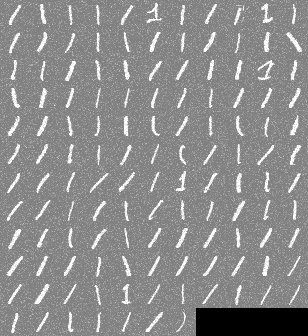

In [19]:
from IPython.display import Image
Image(filename='c1.png')

In [26]:
self = model
batch_size = 128

In [27]:
sample_w_noise = get_noisy_data(self.data)

In [34]:
ones = np.ones((batch_size, 1))
zeros = np.zeros((batch_size, 1))

In [29]:
epoch = 0

In [30]:
batch_idxs = len(self.data) // batch_size
batch_idxs

52

In [31]:
idx = 0

In [32]:
batch = self.data[idx * batch_size:(idx + 1) * batch_size]
batch_noise = sample_w_noise[idx * batch_size:(idx + 1) * batch_size]

In [33]:
batch_images = np.array(batch).astype(np.float32)
batch_noise_images = np.array(batch_noise).astype(np.float32)

In [12]:
batch.shape

(128, 28, 28, 1)

In [15]:
d_loss_real = self.discriminator.train_on_batch(batch_images, ones)
d_loss_real

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [16]:
d_loss_real

0.9547877

In [17]:
d_loss_fake = self.model_train_D.train_on_batch(batch_images, zeros)
d_loss_fake

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


9.054504

In [18]:
self.model_train_R.train_on_batch(batch_noise_images, [batch_noise_images, ones])

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[13.725671, 0.098280005, 13.706015]

In [19]:
self.model_train_R.train_on_batch(batch_noise_images, [batch_noise_images, ones])

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[8.803829, 0.12964642, 8.7779]

In [21]:
g_loss = self.model_train_R.train_on_batch(batch_noise_images, [batch_noise_images, ones])
g_loss

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[0.017105907, 0.0853432, 3.726862e-05]

In [30]:
self.model_train_R.metrics_names

['loss', 'R_loss', 'D_loss']

In [28]:
self.model_train_R.evaluate(batch_noise_images, [batch_noise_images, ones])

128/128 [==============================] - 0s 140us/step


[0.6141282320022583, 0.062403335236012936, 0.6016475558280945]

In [31]:
self.model_train_R.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z (InputLayer)               (None, 28, 28, 1)         0         
_________________________________________________________________
R (Model)                    (None, 28, 28, 1)         373569    
_________________________________________________________________
D (Model)                    (None, 1)                 270849    
Total params: 1,017,539
Trainable params: 373,121
Non-trainable params: 644,418
_________________________________________________________________


c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [25]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)
self.model_train_R.fit(batch_noise_images, [batch_noise_images, ones], callbacks=[tbCallBack], batch_size=batch_size, epochs=1)
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test),
#           callbacks=[tbCallBack])

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

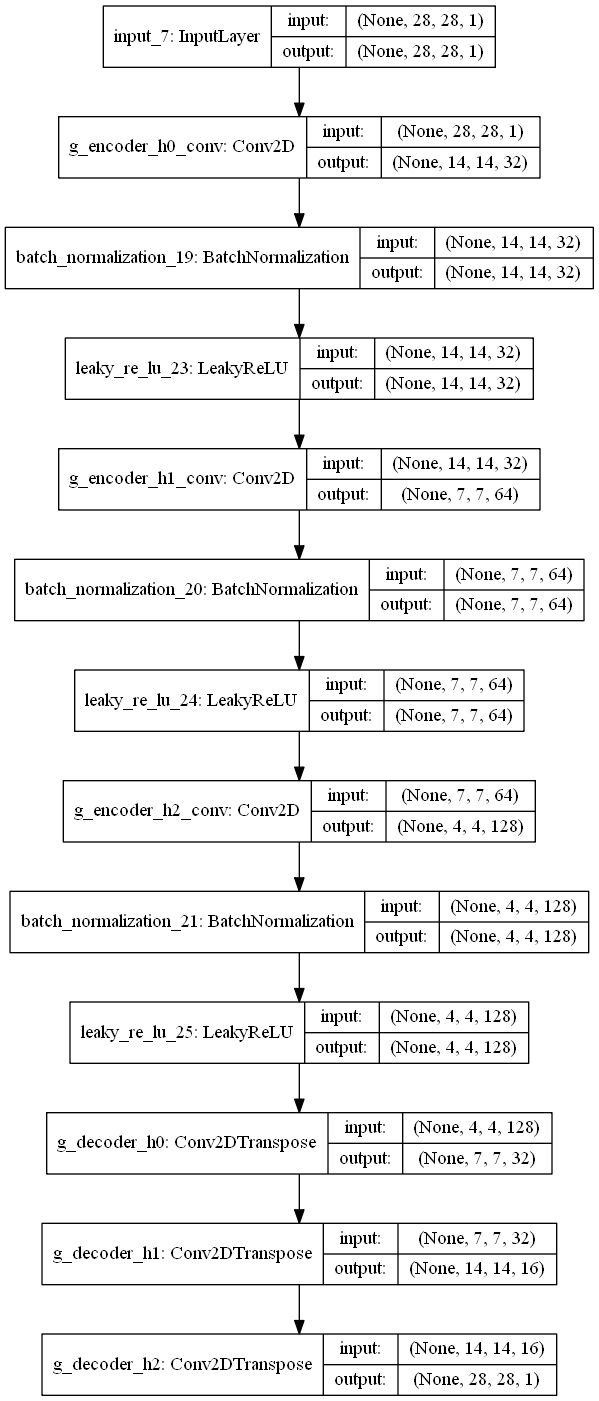

In [33]:
from keras.utils import plot_model
plot_model(model.generator, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 


In [32]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [37]:
from tensorflow.python.keras.layers.convolutional import Conv2DTranspose
Conv2DTranspose?


In [11]:
rows = 8
strides = 2
kernel_size = 5
padding = 0
output_padding = 0
((rows - 1) * strides + kernel_size - 2 * padding + output_padding)

19

In [13]:
import keras
keras.backend.conv2d_transpose?

In [15]:
from keras.utils.conv_utils import *

In [21]:
deconv_length(8, 2, 5, 'same', 1)

16

In [19]:
deconv_length?

In [24]:
from utils import *

In [29]:
s_h, s_w = 28, 28
s_h2, s_w2 = conv_out_size_same(s_h, 2), conv_out_size_same(s_w, 2)
s_h4, s_w4 = conv_out_size_same(s_h2, 2), conv_out_size_same(s_w2, 2)

In [30]:
s_h2, s_h4

(14, 7)

In [7]:
self.model_train_R.load_weights('./checkpoint/ALOCC_Model_39.h5')

In [8]:
(X_train, y_train), (_, _) = mnist.load_data()
specific_idx = np.where(y_train == self.attention_label)[0]
data = X_train[specific_idx].reshape(-1, 28, 28, 1)

In [9]:
pp = self.model_train_R.predict(data[:1])

In [10]:
pp[1]

array([[0.10635007]], dtype=float32)

In [11]:
pp[0].shape

(1, 28, 28, 1)

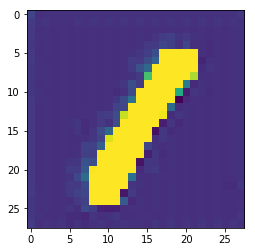

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pp[0].reshape((28, 28)))

In [17]:
specific_idx_2 = np.where(y_train == 5)[0]
data2 = X_train[specific_idx_2].reshape(-1, 28, 28, 1)
samples = data2[:1]

In [18]:
pp = self.model_train_R.predict(samples)

In [19]:
pp[1]

array([[0.09928928]], dtype=float32)

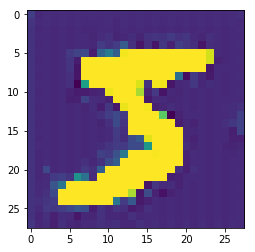

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pp[0].reshape((28, 28)))

In [45]:
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential, Model
optimizer = RMSprop(lr=0.002, clipvalue=1.0, decay=1e-8)
self.discriminator.trainable = True
self.model_train_R = Model(self.z, [self.G, self.D_])
self.model_train_R.compile(loss=['mse', 'binary_crossentropy'],
    loss_weights=[self.r_alpha, 1],
    optimizer=optimizer)

In [46]:
self.model_train_R.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z (InputLayer)               (None, 28, 28, 1)         0         
_________________________________________________________________
R (Model)                    (None, 28, 28, 1)         373761    
_________________________________________________________________
D (Model)                    (None, 1)                 270849    
Total params: 644,610
Trainable params: 643,618
Non-trainable params: 992
_________________________________________________________________


In [48]:
self.model_train_R.non_trainable_weights

[<tf.Variable 'batch_normalization_1/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_2/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_3/moving_mean:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_3/moving_variance:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_4/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_4/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_5/moving_mean:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_5/moving_variance:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_9/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_9/moving_variance:0

In [49]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)
# self.model_train_R.fit(batch_images, [batch_images, ones], callbacks=[tbCallBack], batch_size=batch_size, epochs=1)
self.sampler.fit(batch_images, batch_images, callbacks=[tbCallBack], batch_size=batch_size, epochs=1)


ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

In [50]:
self.sampler.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
g_encoder_h0_conv (Conv2D)   (None, 14, 14, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
g_encoder_h1_conv (Conv2D)   (None, 7, 7, 64)          51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras import losses
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import keras.backend as K
import scipy
import logging
import matplotlib.pyplot as plt
import os

import numpy as np

from utils import *
from kh_tools import *

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_shape = [28, 28, 1]
batch_size = 128

In [3]:
(X_train, y_train), (_, _) = mnist.load_data()
specific_idx = np.where(y_train == 1)[0]
data = X_train[specific_idx].reshape(-1, 28, 28, 1)

In [4]:
batch_images = data[:128]

In [5]:
df_dim = 16
gf_dim = 16
c_dim = 1

In [6]:
image = Input(shape=input_shape, name='z')
# Encoder.
x = Conv2D(filters=df_dim * 2, kernel_size = 5, strides=2, padding='same', name='g_encoder_h0_conv')(image)
# x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters=df_dim * 4, kernel_size = 5, strides=2, padding='same', name='g_encoder_h1_conv')(x)
# x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters=df_dim * 8, kernel_size = 5, strides=2, padding='same', name='g_encoder_h2_conv')(x)
# x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Decoder.
# TODO: need a flexable solution to select output_padding and padding.
x = Conv2DTranspose(gf_dim*2, kernel_size = 5, strides=2, dilation_rate=1, activation='relu', padding='same', output_padding=0, name='g_decoder_h0')(x)
# x = BatchNormalization()(x)
x = Conv2DTranspose(gf_dim*1, kernel_size = 5, strides=2, dilation_rate=1, activation='relu', padding='same', output_padding=1, name='g_decoder_h1')(x)
# x = BatchNormalization()(x)
x = Conv2DTranspose(c_dim,    kernel_size = 5, strides=2, dilation_rate=1, activation='tanh', padding='same', output_padding=1, name='g_decoder_h2')(x)
generator = Model(image, x, name='R')

In [7]:
optimizer = RMSprop(lr=0.002, clipvalue=1.0, decay=1e-8)
generator.compile(optimizer=optimizer, loss='mse')
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z (InputLayer)               (None, 28, 28, 1)         0         
_________________________________________________________________
g_encoder_h0_conv (Conv2D)   (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
g_encoder_h1_conv (Conv2D)   (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
g_encoder_h2_conv (Conv2D)   (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

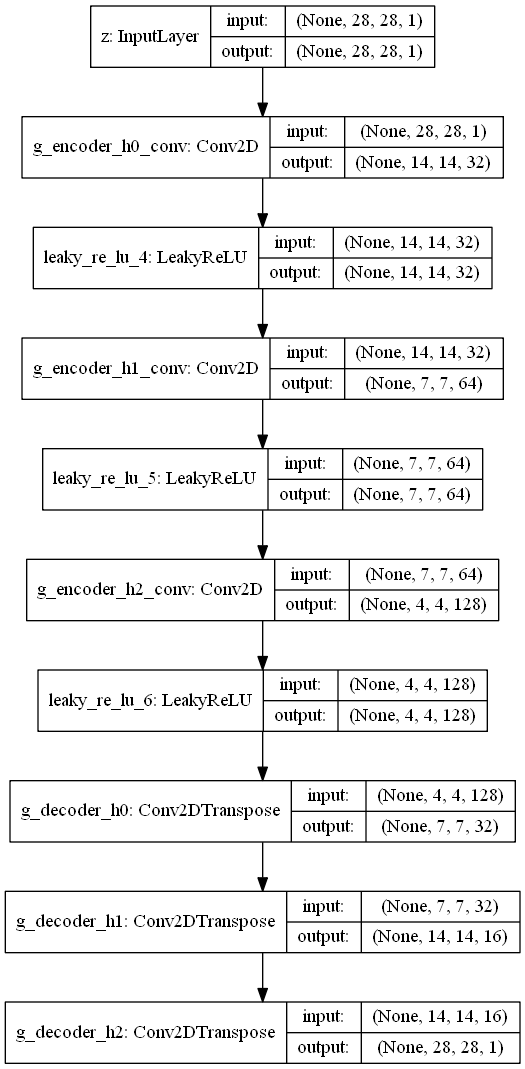

In [15]:
from keras.utils import plot_model
plot_model(generator, to_file='generator.png', show_shapes=True)
from IPython.display import Image
Image(filename='generator.png') 


In [8]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)

In [9]:
generator.fit(batch_images, batch_images,
              validation_data=(batch_images, batch_images),
              callbacks=[tbCallBack], batch_size=batch_size, epochs=1)

Train on 128 samples, validate on 128 samples
Epoch 1/1
128/128 [==============================] - 1s 9ms/step - loss: 4367.2168 - val_loss: 4335.9556
